# Aerofit Project

### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- Marital Status:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in Dollars)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

### Product Portfolio:

- The KP281 is an entry-level treadmill that sells for 1,500 Dollars.
- The KP481 is for mid-level runners that sell for 1,750 Dollars.
- The KP781 treadmill is having advanced features that sell for 2,500 Dollars.

### What good looks like?

- Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
- Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
- Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
- Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
- Check correlation among different factors using heat maps or pair plots.
- With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
- Customer Profiling - Categorization of users.
- Probability- marginal, conditional probability.
- Some recommendations and actionable insights, based on the inferences.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- There are no null values in the dataset.
- The data-types of the various columns look fine as well.

### Question 1 - How many treadmills of each product type were bought?

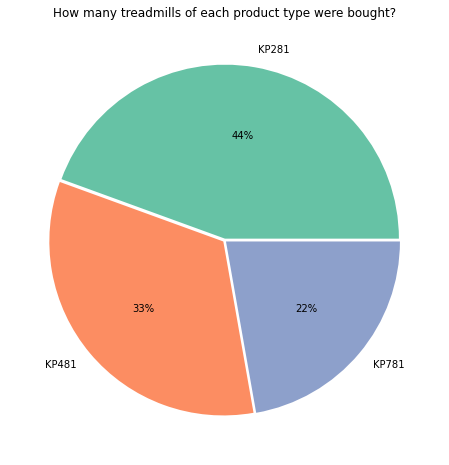

In [5]:
plt.figure(figsize=(8,8))
plt.pie(df['Product'].value_counts(),labels=df['Product'].value_counts().index,
        autopct='%.0f%%',colors=sns.color_palette('Set2'),explode=[0.01,0.01,0.01])
plt.title('How many treadmills of each product type were bought?')
plt.savefig('1.jpg')
plt.show()

Inference : We see that KP281 models were bought the most, followed by KP481 and lastly KP781 in the ratio 4:3:2. One reason could be that KP281 are the least expensive and KP781 are the most expensive.

### Question 2 - How many treadmills of each product type were bought by different genders?

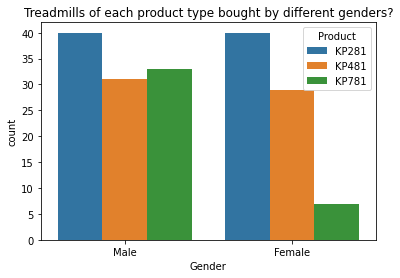

In [6]:
sns.countplot(data=df,hue='Product',x='Gender')
plt.title('Treadmills of each product type bought by different genders?')
plt.savefig('2.jpg')

In [7]:
# Probability of buying different models, based on the gender. 
# Ex. probability of buying KP281, given that the the person is a female is 0.526
pd.crosstab(df['Gender'],df['Product'],normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


Inference : Irrespective of the gender, we observe that the KP281 model is the favourite be it a Man or a Woman. For females specifically, the preference for the model KP781 is very less.

### Question 3 - How many treadmills of each product type were bought by different Marital Status?

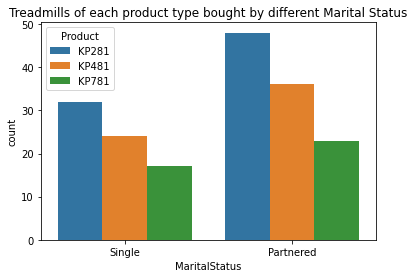

In [8]:
sns.countplot(data=df,hue='Product',x='MaritalStatus')
plt.title('Treadmills of each product type bought by different Marital Status')
plt.savefig('3.jpg')

In [9]:
# Probability of buying different models, based on the Marital Status. 
# Ex. probability of buying KP281, given that the the person is a partenered is 0.448
pd.crosstab(df['MaritalStatus'],df['Product'],normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


Inference : Irrespective of the marital status, we observe that KP281 models are the most preferred and KP781 models are the least preferred.

### Question 4 - How is the income related to people buying different treadmill models?

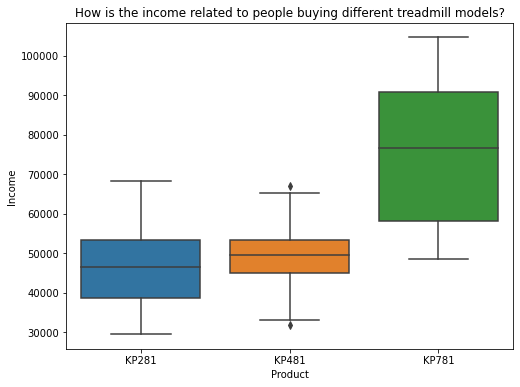

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='Product',y='Income')
plt.title('How is the income related to people buying different treadmill models?')
plt.savefig('4.jpg')

<AxesSubplot:xlabel='Product', ylabel='Income'>

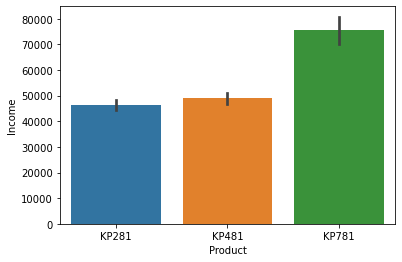

In [11]:
sns.barplot(data=df,x='Product',y='Income')

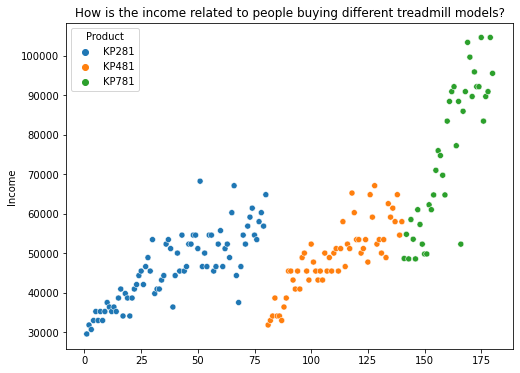

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=df['Income'],x=range(1,len(df)+1),hue=df['Product'])
plt.title('How is the income related to people buying different treadmill models?')
plt.savefig('5.jpg')
plt.show()

Inference : Both the mean and median income of people who bought the KP781 model is greater than those who bought KP281 and KP481, but the mean and median incomes and distribution of people who bought the KP281 model and KP481 are almost similar. Also we observe that people having income greater than 70,000 dollars bought the KP781 model, so we can infer that people having deep pockets prefer the most expensive model - KP781. 

### Question 5 - How many treadmills were bought by people belonging to different age groups?

In [13]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [14]:
print('Minimum Age =',min(df['Age']),'And','Maximum Age =',max(df['Age']))

Minimum Age = 18 And Maximum Age = 50


In [15]:
def function(x):
    
    if x>=46:
        return '46-50'
    elif x>=41:
        return '41-45'
    elif x>=36:
        return '36-40'
    elif x>=31:
        return '31-35'
    elif x>=26:
        return '26-30'
    elif x>=21:
        return '21-25'
    else:
        return '18-20'
    

In [16]:
#Converting Discrete Data To Categorical Data
df['Age']=df['Age'].apply(function)

In [17]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18-20,Male,14,Single,3,4,29562,112
1,KP281,18-20,Male,15,Single,2,3,31836,75
2,KP281,18-20,Female,14,Partnered,4,3,30699,66
3,KP281,18-20,Male,12,Single,3,3,32973,85
4,KP281,18-20,Male,13,Partnered,4,2,35247,47


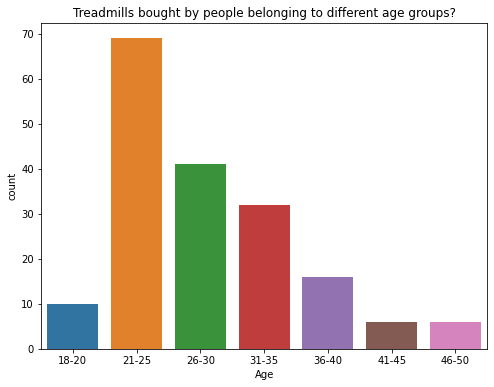

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Age')
plt.title('Treadmills bought by people belonging to different age groups?')
plt.savefig('6.jpg')

Inference : Most customers were in the age group of 21-25 followed by 26-30 and 31-35. So mostly young people bought treadmills.

### Question 6 - How many treadmills of each product type were bought by people belonging to different age groups?

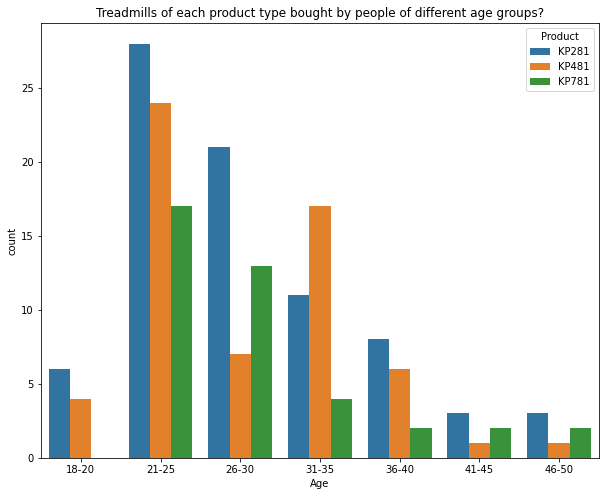

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Age',hue='Product')
plt.title('Treadmills of each product type bought by people of different age groups?')
plt.savefig('7.jpg')

In [20]:
# Probability of buying different models, based on the age group. 
# Ex. probability of buying KP281, given that the the person has an age between 18-20 is 0.6
pd.crosstab(df['Age'],df['Product'],normalize='index')

Product,KP281,KP481,KP781
Age,,,
18-20,0.600000,0.400000,0.000000
21-25,0.405797,0.347826,0.246377
26-30,0.512195,0.170732,0.317073
31-35,0.343750,0.531250,0.125000
36-40,0.500000,0.375000,0.125000
41-45,0.500000,0.166667,0.333333
46-50,0.500000,0.166667,0.333333


Inference - From the plot and crosstab, we observe the following :

- For age group 18-20, there was no customer who bought the most expensive model KP781. One reason could be that students cannot afford such expensive models.
- For age groups 26-30, 41-45 and 46-50, we observe that the most preferred model is KP281. However one important observation was that people prefer KP781 over KP481, inspite of it being the most expensive. Maybe there are few people in these age groups who are very concerned about their fitness and prefer using the best model having advanced features.
- For age group 31-35, we observe that people prefer the mid-range model KP481 over the other 2 models. On reason could be that people would not like to go either for the most expensive or the cheapest product. Maybe the midrange model is a balance of both price and features.
- For age group 21-25, we see that the most bought model is KP281 followed by KP481 and KP781. The least expensive model is most preferred by people belonging to this age group. One reason could be that they would still be studying or would have just started with their jobs and therefore do not want to spend much.
- For age group 36-40 also, we see that the most bought model is KP281 followed by KP481 and KP781. One reason that the model KP281 is most preferred could be that people belonging to this group would be burdened with various EMIs and therefore would want to cut down on the expenses.

### Question 7 - How the various treadmill models bought are related to the usage?
Usage : The average number of times the customer plans to use the treadmill each week. 

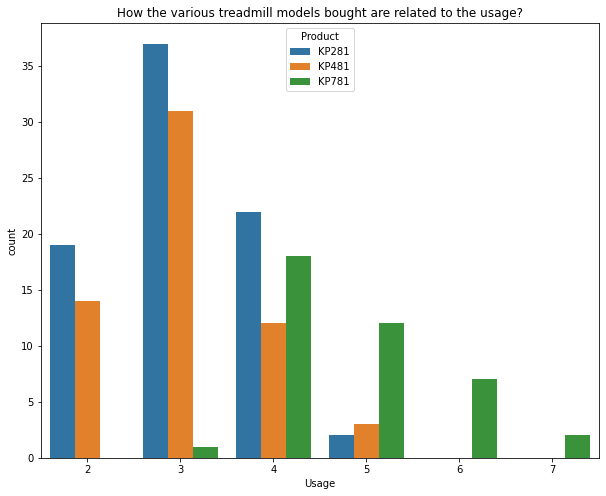

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Usage',hue='Product')
plt.title('How the various treadmill models bought are related to the usage?')
plt.savefig('8.jpg')

In [22]:
# Probability of buying different models, based on the usage. 
# Ex. probability of buying KP281, given that the the person has a usage of 2 is 0.575
pd.crosstab(df['Usage'],df['Product'],normalize='index')

Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000


Inference - From this plot and crosstab, we observe the following :
- For people who on average expect to use the treadmill 5-7 times each week, they prefer the best model KP781. One reason could be that these people want the most advanced features since they would be using the treadmill almost daily.
- For people who on average expect to use the treadmill 2-4 times each week, they prefer the least expensive model KP281. One reason could be that these people would not be using the treadmill daily, and therefore do not want to invest a lot.
- The no of people who want to buy the most expensive model KP781 is - 0 for people who wish to use the treadmill 2 times a week and negligible for people who wish to use the treadmill 3 times a week.

### Question 8 - How the various treadmill models bought are related to the Fitness?
Fitness : Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

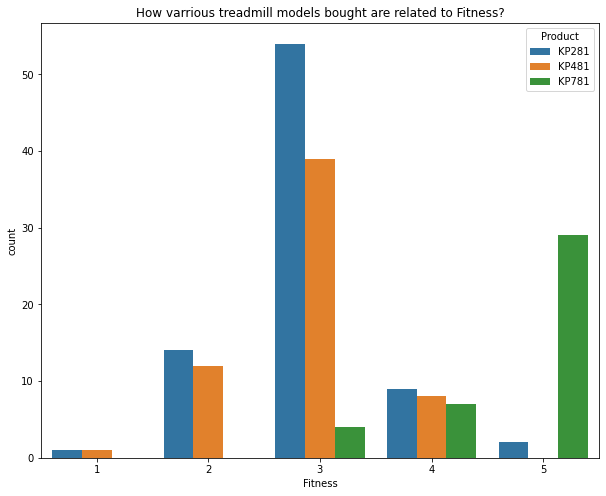

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Fitness',hue='Product')
plt.title('How varrious treadmill models bought are related to Fitness?')
plt.savefig('9.jpg')

In [24]:
# Probability of buying different models, based on the fitness. 
# Ex. probability of buying KP281, given that the the person has a fitness of 1 is 0.5
pd.crosstab(df['Fitness'],df['Product'],normalize='index')

Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484


Inference : From this plot, we observe the following :
    
- For people who consider themselves in excellent shape(5), they prefer the most expensive model. Maybe these people are fitness enthusiasts and thus want to maintain and further improve their fitness.
- For people who have rated themselves 4 in fitness, we see a mix of opinions. There is almost an equal preference for each of the 3 models.
- For people who consider themselves in not so excellent shape(1 - 3), they prefer the least expensive model. Maybe these people are just about to start their fitness journey or maybe they believe that an ordinary machine with not so advanced features is sufficient to mantain their fitness.

### Question 9 - How the various treadmill models bought are related to the Miles they expect to run each week?

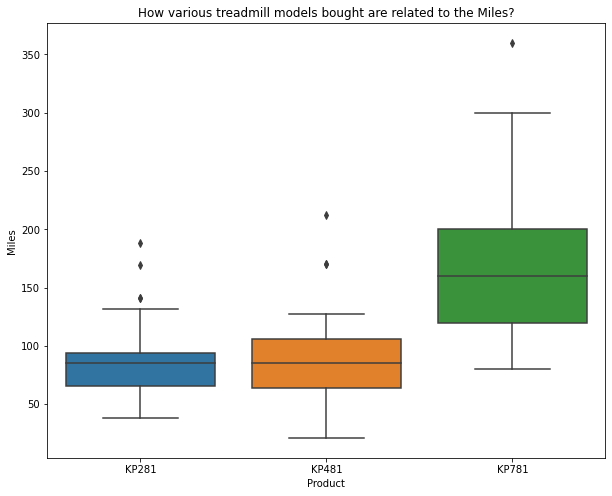

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Product',y='Miles')
plt.title('How various treadmill models bought are related to the Miles?')
plt.savefig('10.jpg')

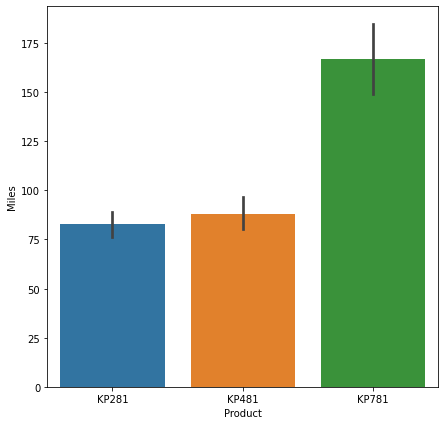

In [26]:
plt.figure(figsize=(7,7))
sns.barplot(data=df,x='Product',y='Miles')
plt.show()

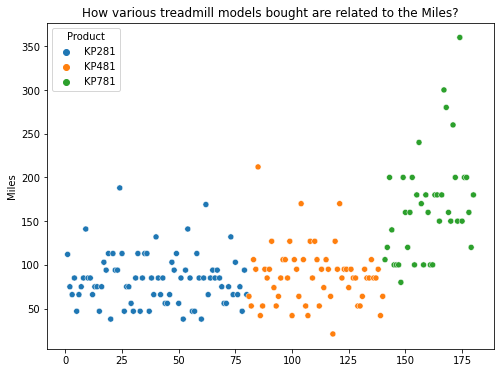

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=df['Miles'],x=range(1,len(df)+1),hue=df['Product'])
plt.title('How various treadmill models bought are related to the Miles?')
plt.savefig('11.jpg')
plt.show()

Inference - From the 2 plots, we observe the following :
- For people who expect to run more miles, they usually buy the most expensive model KP781. One reason could be that the KP781 model provides the most advanced features. 
- For people who buy the KP281 and KP 481 model, the mean and median expected no of miles that the people will run is almost the same.
- Also we observe that people expecting to run more than 150 miles mostly always bought the KP781 model.

### Question 10 - How the various treadmill models bought are related to the Education that people have?

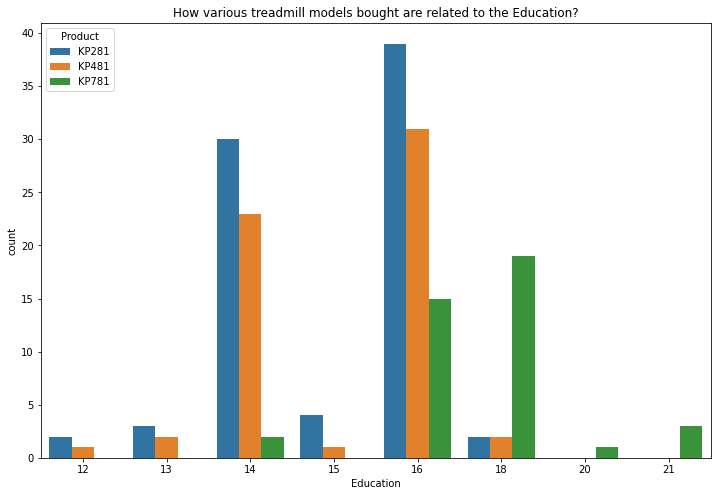

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,hue='Product',x='Education')
plt.title('How various treadmill models bought are related to the Education?')
plt.savefig('12.jpg')

In [29]:
# Probability of buying different models, based on the education. 
# Ex. probability of buying KP281, given that the the person has 12 years of education 0.667
pd.crosstab(df['Education'],df['Product'],normalize='index')

Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000


Inference : For people who are highly educated(18-21), we observe that they prefer the most expensive model KP781. One reason could be that having more no of education years means a better high paying job, and thus the capacity to afford expensive products. Another reason could be that these people understand the importance of the advanced features and might want to use them. For people who are not so educated, we see that they prefer to buy the models KP281 and KP481.

# Recommendations :


#### - It is evident that KP281 models sell the most (44 % of the time), followed by KP481 and then KP781. Therefore the company should keep abundant stock of the KP281 model at any given time.

#### - Irrespective of the marital status and gender, we observe that KP281 models are the most preferred and KP781 models are the least preferred. 


#### - The probabilty of buying the KP781 model, given that the person is a female is almost 9%, which indicates that females rarely buy the most expensive model. Therefore for females, the other 2 models should be the ones that should be first recommended by the company.


#### - People having income greater than 70,000 dollars always bought the KP781 model, so the comapny can recommend the most expensive model - KP781 to people having income more than 70000 dollars.

#### - The company should recommend the mid-range model KP481 for people in the age group 31-35. For all other age groups, the company can recommend the KP281 model first, followed by the other 2 models.

#### - The company should recommend the best model KP781 to people who on average expect to use the treadmill 4-7 times each week. For people who on average expect to use the treadmill 2-4 times each week, the company can recommend the KP281 model followed by the KP481 model.

#### - The company should recommend the most expensive mode KP781 to people who consider themselves in excellent shape(5 in fitness). For people who consider themselves (1 - 4) in fitness, the company can recommend the KP281 model followed by the KP481 model.

#### -The company can recommend the the most expensive model KP781 to people who expect to run more than 150 miles, otherwise they can recommend the other 2 models - KP281 and KP481.

#### - The company should recommend the most expensive model KP781 to people who have more than or equal to 18 years of education, and can recommend the other 2 models - KP281 and KP481 to people who have less than 18 years of education.
